<a href="https://colab.research.google.com/github/chourouk-sun/customer-segmentation/blob/main/customer_seg_with_kMeans_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **start**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

df.head()               # Show first 5 rows
df.tail()               # Show last 5 rows
df.shape                # Rows and columns
df.info()               # Column types and non-null info
df.describe()           # Summary statistics (mean, std, etc.)
df.columns              # List of column names
df.dtypes               # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


# ****Exploratory Data Analysis EDA**

In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
#convert

In [ ]:
df = df.drop('CustomerID', axis=1)
#exclude the id columns

In [ ]:
df.isnull().sum()       # Total missing values per column
df.duplicated().sum()   # Count of duplicated rows

np.int64(0)

In [ ]:
#Scale All Features
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # and any others
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
#normaliz

In [ ]:
#check the data after the cleaning
df[features].isnull().sum()

,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# **Visual Exploration**

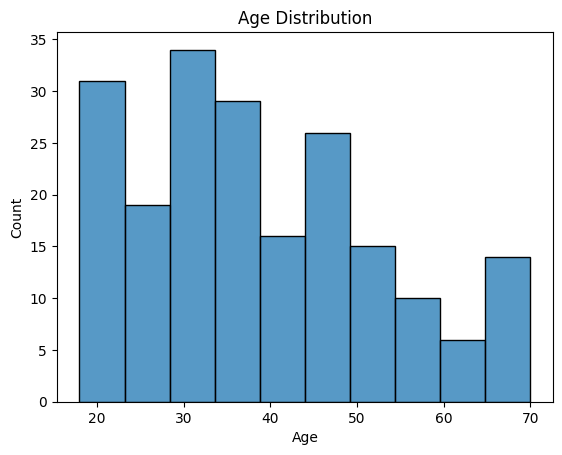

In [ ]:
#Distribution of Age or Income
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution')
plt.show()

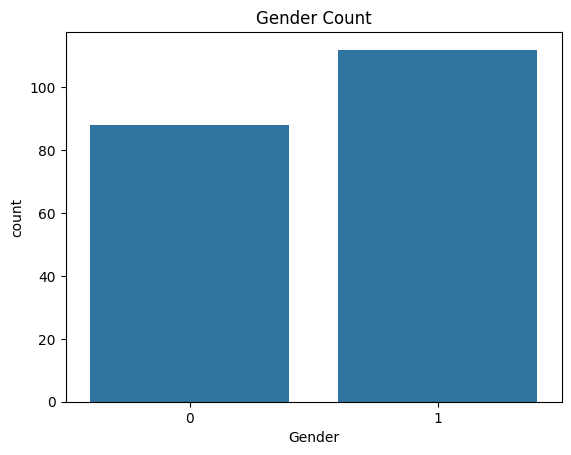

In [ ]:
#2. Gender Count
sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.show()

In [ ]:
df['Gender'].value_counts()

,count
Gender,
1,112
0,88


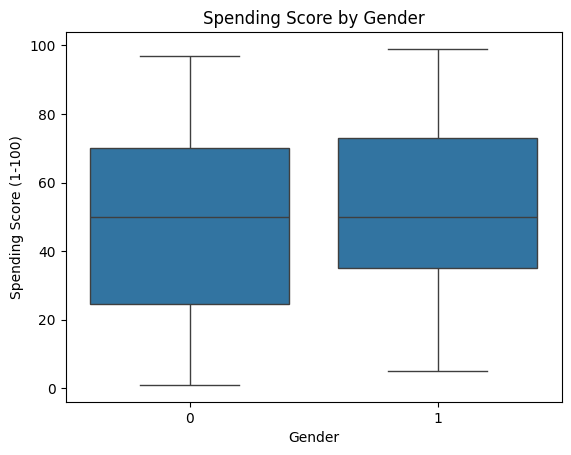

In [ ]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.show()

we can see that the male scale is closer to 0 and the female is coler to 100 so the female spend more.

we can exclude the gender features as there is no big difference in spending between the 2 gneder.


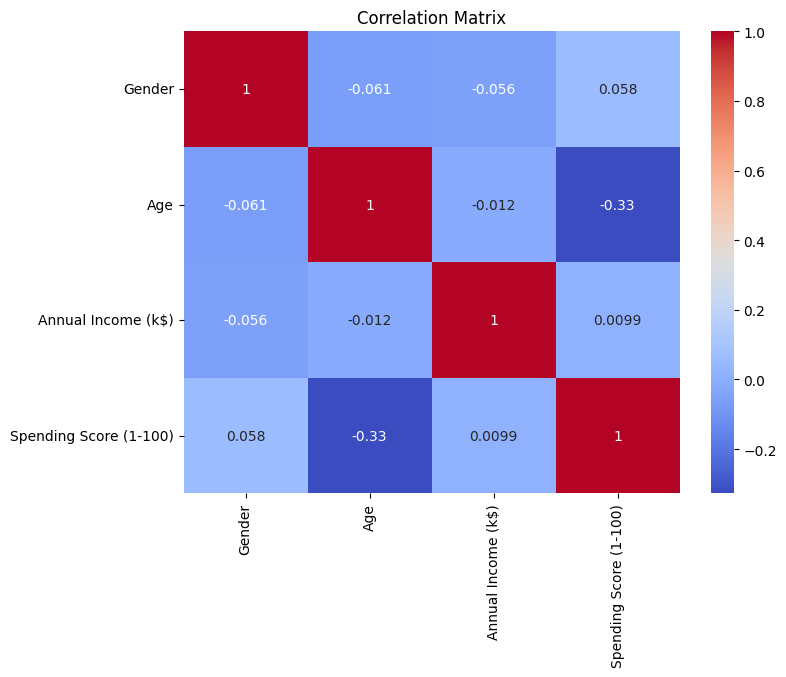

In [ ]:
#4. Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

(-0.3) we can see that there is a moderate negativ relation between age and spanding score , here as age increse the spanding score decrease so we can say older people tend to not spand much unlike yonger people

gender doesn't have correlation with the others features,: it is her optional

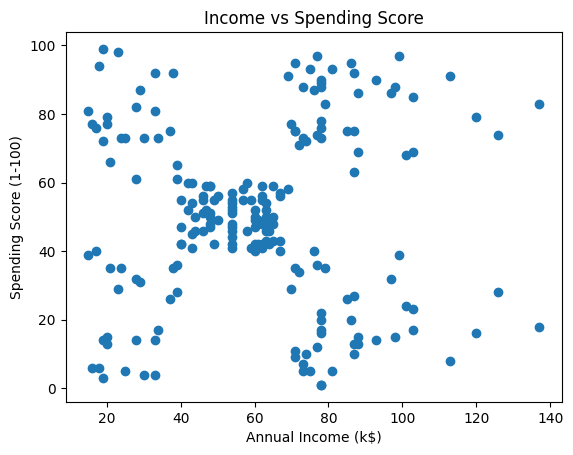

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.show()

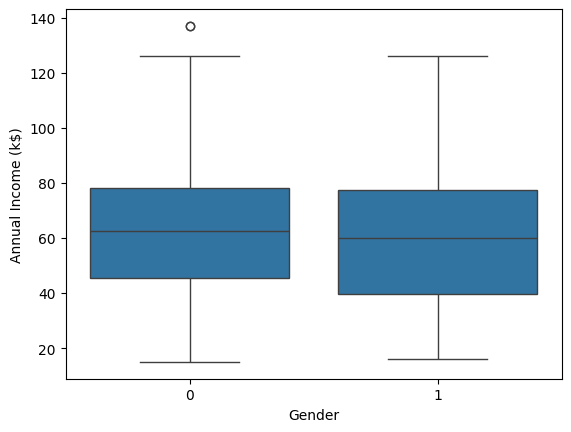

In [ ]:
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)')  # Compare income by gender
plt.show()

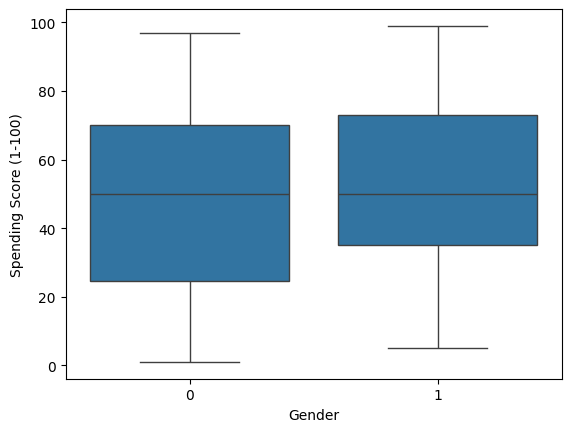

In [ ]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.show()

# **Clustering**

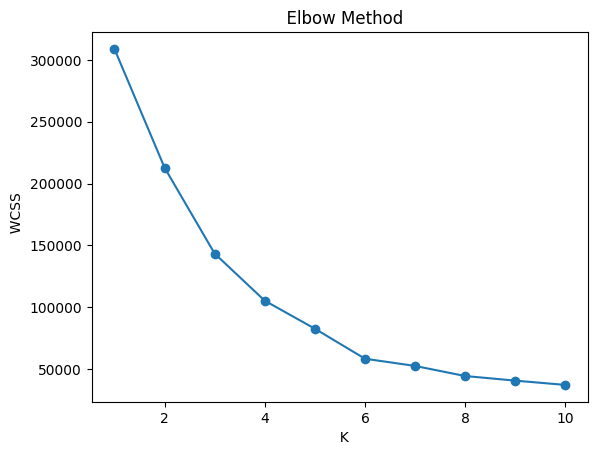

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  #  # List to store error per number of groups

#from 1 till 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('  K')
plt.ylabel('  WCSS')
plt.title('  Elbow Method')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'For k = {k}, Silhouette Score = {score}')


For k = 2, Silhouette Score = 0.33547192894004574
For k = 3, Silhouette Score = 0.3579234303882264
For k = 4, Silhouette Score = 0.4039582785148566
For k = 5, Silhouette Score = 0.40846873777345605
For k = 6, Silhouette Score = 0.43106526216603014
For k = 7, Silhouette Score = 0.410091114520974
For k = 8, Silhouette Score = 0.3673663165322295
For k = 9, Silhouette Score = 0.37442148555078425
For k = 10, Silhouette Score = 0.36186970479722974


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(scaled_data)
df['Cluster'] = labels

# **pairwise plotting / feature pair visualization**

In [ ]:
import numpy as np

cluster_sizes = np.bincount(labels)
print(cluster_sizes)

percentages = (cluster_sizes / len(labels)) * 100
print(percentages)

[45 39 25 40 30 21]
[22.5 19.5 12.5 20.  15.  10.5]


In [ ]:
# Consistent color mapping for clusters
cluster_colors = {
    0: 'red',
    1: 'orange',
    2: 'green',
    3: 'blue',
    4: 'pink',
    5: 'yellow'
}

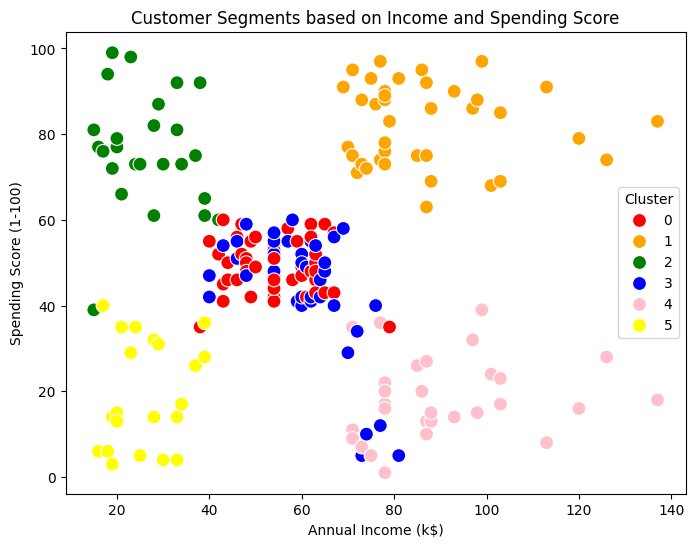

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette=cluster_colors,
    s=100
)
plt.title('Customer Segments based on Income and Spending Score')
plt.show()


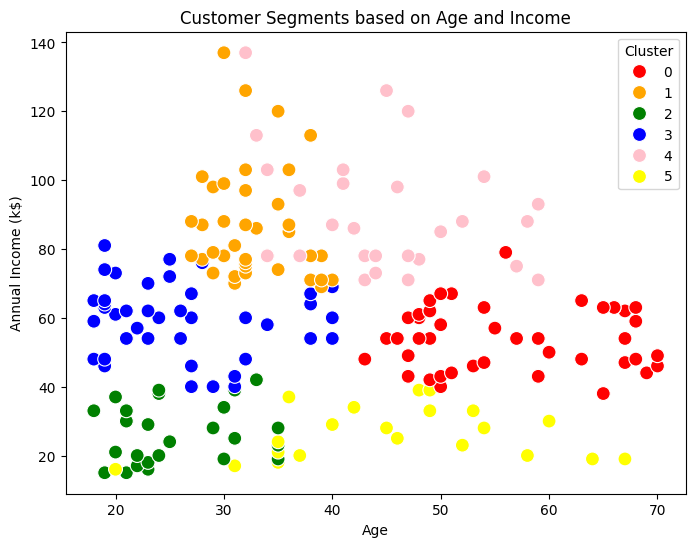

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    hue='Cluster',
    palette=cluster_colors,
    s=100
)
plt.title('Customer Segments based on Age and Income')
plt.show()

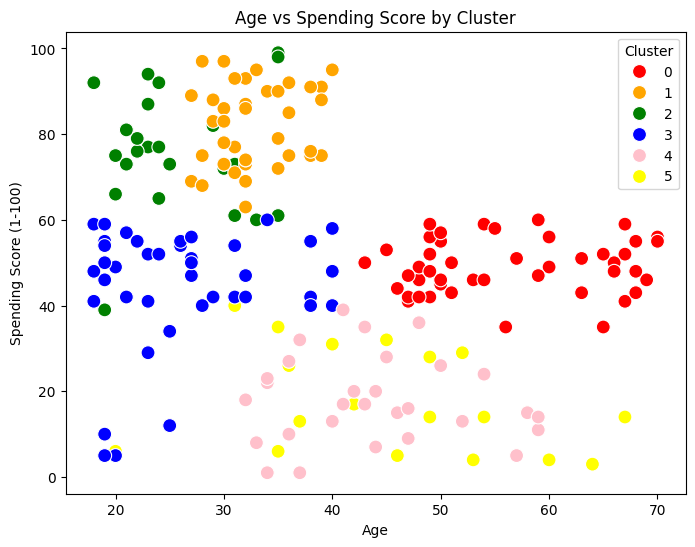

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette=cluster_colors,
    s=100
)
plt.title('Age vs Spending Score by Cluster')
plt.show()

#### **Cluster 0 :**
* **Age:** 40 to 70+
* **Spending Score:** Medium (mostly around 40–60)

#### **Cluster 1:**
* **Age:** 25–35
* **Spending Score:** High (70–100)

#### **Cluster 2:**
* **Age:** 20–30
* **Spending Score:** High (70–100)

#### **Cluster 3:**
* **Age:** 18–40
* **Spending Score:** Low to medium (5–60)

#### **Cluster 4:**
* **Age:** 30–60
* **Spending Score:** Low (mostly 0–40)

#### **Cluster 5 (Yellow):**
* **Age:** 30–65
* **Spending Score:** Very low (0–30)


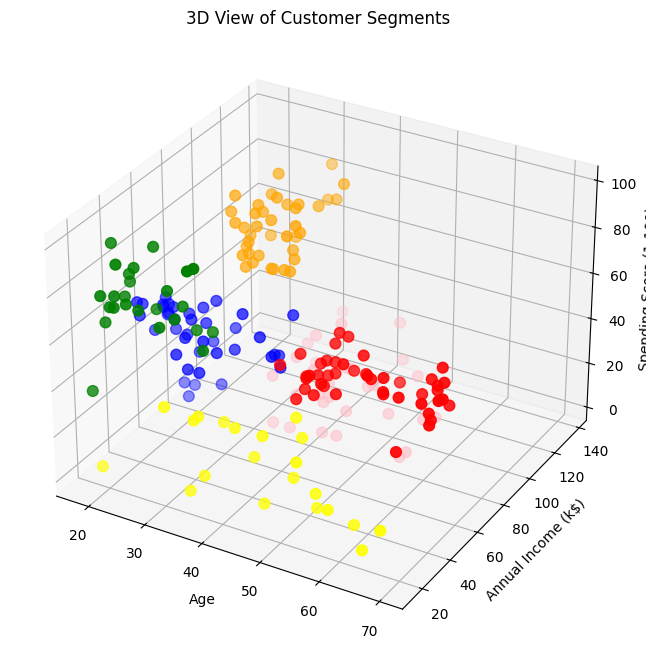

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Step 1: Map cluster numbers to colors
df['Color'] = df['Cluster'].map(cluster_colors)

# Step 2: Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Color'],  # Use mapped colors
    s=60
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D View of Customer Segments')

plt.show()

# **interpretation**

In [ ]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


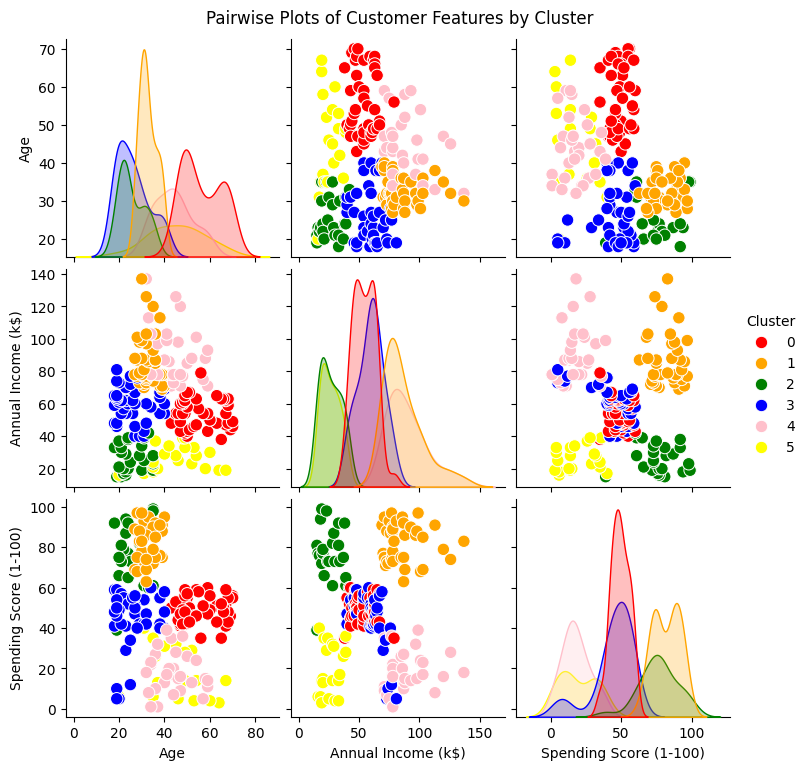

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Cluster is int
df['Cluster'] = df['Cluster'].astype(int)

# Pairplot with consistent cluster colors
sns.pairplot(
    df,
    hue='Cluster',
    vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    palette=cluster_colors,
    plot_kws={'s': 80}  # Optional: control dot size
)
plt.suptitle('Pairwise Plots of Customer Features by Cluster', y=1.02)
plt.show()

##**PCA**

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

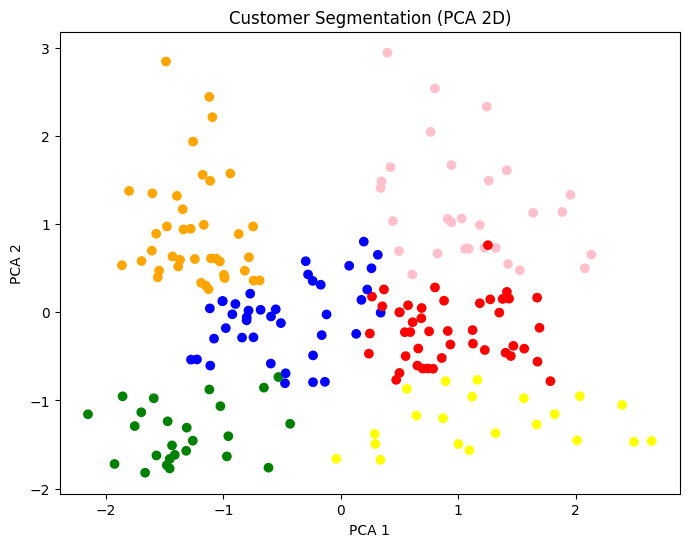

In [ ]:
import matplotlib.pyplot as plt

# Map each label to its corresponding color
colors = [cluster_colors[label] for label in labels]

# Plot with custom colors
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation (PCA 2D)')
plt.show()

we can see that c red and bleu are overlapping with the others unlike the others are distinct to each other

the yellow cluster is sparse likewise the pink one

the green and bleu and red and orange are dense  

In [ ]:
import pandas as pd

feature_names =['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# Show the PCA component weights for each original feature

loadings = pd.DataFrame(
    pca.components_,
    columns=feature_names,
    index=['PCA1', 'PCA2']
)

print(loadings.T)

                            PCA1      PCA2
Age                     0.706382  0.030141
Annual Income (k$)     -0.048024  0.998832
Spending Score (1-100) -0.706199 -0.037775


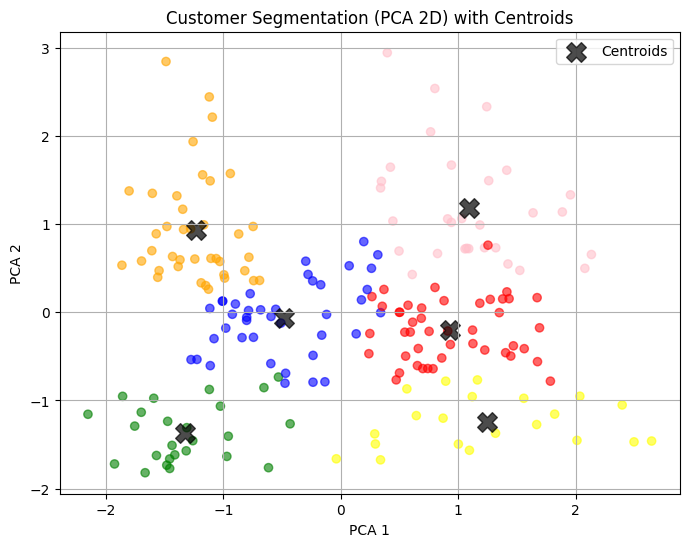

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Transform cluster centers into PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Use custom colors for each data point
colors = [cluster_colors[label] for label in labels]

plt.figure(figsize=(8,6))

# Scatter plot of the PCA-transformed data with custom colors
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, alpha=0.6)

# Plot cluster centroids in PCA space
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
            c='black', s=200, alpha=0.7, marker='X', label='Centroids')

# Labels and title
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation (PCA 2D) with Centroids')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
#Do people who earn more also spend more?”

np.float64(0.009902848094037608)

✅ Interpretation: There is almost no linear correlation between Annual Income and Spending Score.

In simple terms:

People who earn more do not necessarily spend more (in terms of the score).

The relationship between income and spending score is weak or nonexistent.

It may be non-linear, or influenced by other factors (like age, gender, lifestyle, etc.).

In [ ]:
df.groupby('Cluster').mean(numeric_only=True)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.577778,56.333333,54.266667,49.066667
1,0.538462,32.692308,86.538462,82.128205
2,0.560000,25.560000,26.480000,76.240000
3,0.600000,26.125000,59.425000,44.450000
4,0.466667,44.000000,90.133333,17.933333
5,0.619048,45.523810,26.285714,19.380952


In [ ]:
df.groupby('Cluster').describe()

Gender                                                Age             \
         count      mean       std  min  25%  50%  75%  max count       mean   
Cluster                                                                        
0         45.0  0.577778  0.499495  0.0  0.0  1.0  1.0  1.0  45.0  56.333333   
1         39.0  0.538462  0.505035  0.0  0.0  1.0  1.0  1.0  39.0  32.692308   
2         25.0  0.560000  0.506623  0.0  0.0  1.0  1.0  1.0  25.0  25.560000   
3         40.0  0.600000  0.496139  0.0  0.0  1.0  1.0  1.0  40.0  26.125000   
4         30.0  0.466667  0.507416  0.0  0.0  0.0  1.0  1.0  30.0  44.000000   
5         21.0  0.619048  0.497613  0.0  0.0  1.0  1.0  1.0  21.0  45.523810   

         ... Annual Income (k$)        Spending Score (1-100)             \
         ...                75%    max                  count       mean   
Cluster  ...                                                               
0        ...              62.00   79.0                   45.0  49.066667   
1        ...              95.00  137.0                   39.0  82.128205   
2        ...              33.00   42.0                   25.0  76.240000   
3        ...              65.50   81.0                   40.0  44.450000   
4        ...              98.75  137.0                   30.0  17.933333   
5        ...              33.00   39.0                   21.0  19.380952   

                                                   
               std   min   25%   50%    75%   max  
Cluster                                            
0         6.300794  35.0  45.0  49.0  55.00  60.0  
1         9.364489  63.0  74.5  83.0  90.00  97.0  
2        13.562448  39.0  72.0  76.0  82.00  99.0  
3        14.279176   5.0  41.0  48.0  54.25  60.0  
4         9.888807   1.0  11.5  16.5  23.75  39.0  
5        12.555780   3.0   6.0  15.0  31.00  40.0  

[6 rows x 32 columns]

In [ ]:
import pandas as pd

# Assuming your clustered DataFrame is called df
# and it includes a 'Cluster' column and a 'Gender' column (0=Male, 1=Female)

# Group by cluster and calculate counts
gender_counts = df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack() * 100

# Rename columns for clarity
gender_counts.columns = ['% Male (0)', '% Female (1)']

# Optional: round values
gender_counts = gender_counts.round(2)

# Display result
print(gender_counts)

         % Male (0)  % Female (1)
Cluster                          
0             42.22         57.78
1             46.15         53.85
2             44.00         56.00
3             40.00         60.00
4             53.33         46.67
5             38.10         61.90


In [ ]:
df['Segment'] = df['Cluster'].map({
    0: 'High Income, Low Spend.Older, Medium Spend',
    1: 'Young, High Spend.Young, High Spend',
    2: 'Low Income, Low Spend,Young, High Spend',
    3: 'Mid Income, Moderate Spend.Mixed Age, Medium Spend',
    4: 'Elderly, Low Spend.Mid Age, Low Spend',
    5: 'Teens, High Spend.Older, Very Low Spend'  # example — you can change this based on your real cluster analysis
})
#description of the clusters i write them later

Make sure the descriptions match your own cluster insights. If you haven’t written the descriptions yet, just use placeholders for now and update later.

In [ ]:
print(df[['Cluster', 'Segment']].head(10))

   Cluster                                  Segment
0        2  Low Income, Low Spend,Young, High Spend
1        2  Low Income, Low Spend,Young, High Spend
2        5  Teens, High Spend.Older, Very Low Spend
3        2  Low Income, Low Spend,Young, High Spend
4        5  Teens, High Spend.Older, Very Low Spend
5        2  Low Income, Low Spend,Young, High Spend
6        5  Teens, High Spend.Older, Very Low Spend
7        2  Low Income, Low Spend,Young, High Spend
8        5  Teens, High Spend.Older, Very Low Spend
9        2  Low Income, Low Spend,Young, High Spend


In [ ]:
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster   Color  \
0       0   19                  15                      39        2   green   
1       0   21                  15                      81        2   green   
2       1   20                  16                       6        5  yellow   
3       1   23                  16                      77        2   green   
4       1   31                  17                      40        5  yellow   

                                   Segment  
0  Low Income, Low Spend,Young, High Spend  
1  Low Income, Low Spend,Young, High Spend  
2  Teens, High Spend.Older, Very Low Spend  
3  Low Income, Low Spend,Young, High Spend  
4  Teens, High Spend.Older, Very Low Spend  


In [ ]:
print(df['Cluster'].value_counts())
#This helps you understand how many clients belong to each cluster.

Cluster
0    45
3    40
1    39
4    30
2    25
5    21
Name: count, dtype: int64


In [ ]:
df.groupby('Cluster')['Gender'].value_counts(normalize=True)


Cluster  Gender
0        1         0.577778
         0         0.422222
1        1         0.538462
         0         0.461538
2        1         0.560000
         0         0.440000
3        1         0.600000
         0         0.400000
4        0         0.533333
         1         0.466667
5        1         0.619048
         0         0.380952
Name: proportion, dtype: float64

Why this is useful: It helps you understand if gender influences the grouping (clusters). For example, if one cluster is mostly women, maybe they have a similar shopping behavior.

In [ ]:
gender_distribution = df.groupby(['Cluster', 'Gender']).size().unstack()
print(gender_distribution)


Gender    0   1
Cluster        
0        19  26
1        18  21
2        11  14
3        16  24
4        16  14
5         8  13


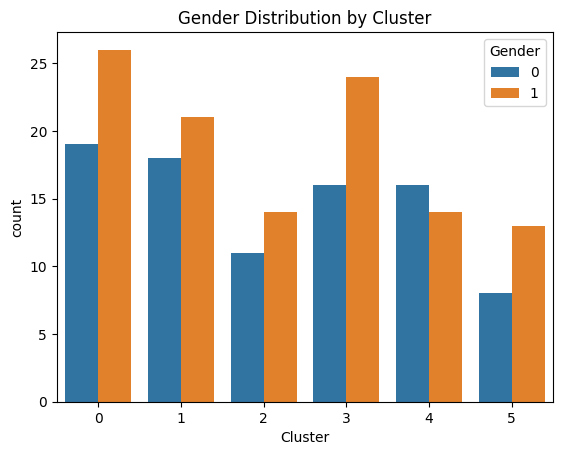

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Cluster', hue='Gender')
plt.title('Gender Distribution by Cluster')
plt.show()

In [ ]:
percentages = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100
print(percentages)

Gender           0          1
Cluster                      
0        42.222222  57.777778
1        46.153846  53.846154
2        44.000000  56.000000
3        40.000000  60.000000
4        53.333333  46.666667
5        38.095238  61.904762


# **Hierarchical Clustering**

In [ ]:
# Assuming pca_result contains the 2D PCA-transformed data
X = pca_result

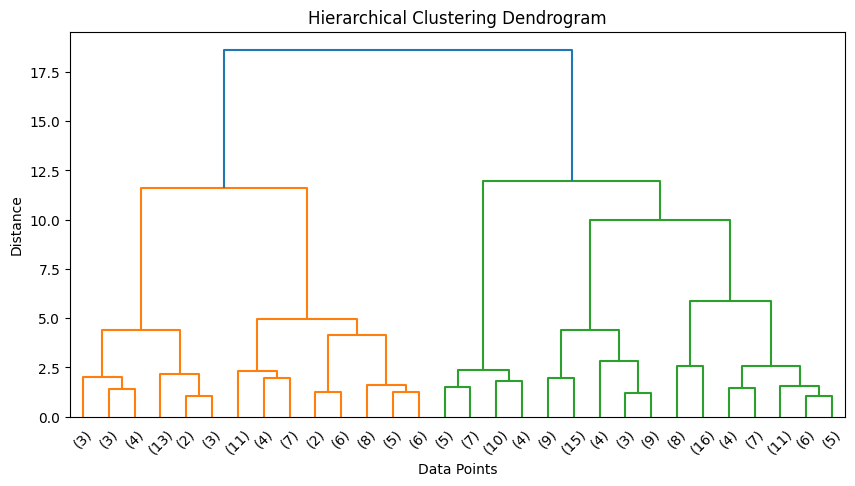

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Create the linkage matrix
linked = linkage(X, method='ward')  # Ward minimizes variance within clusters

# Optional: Plot dendrogram to visually choose number of clusters
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram into the same number of clusters as K-Means
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

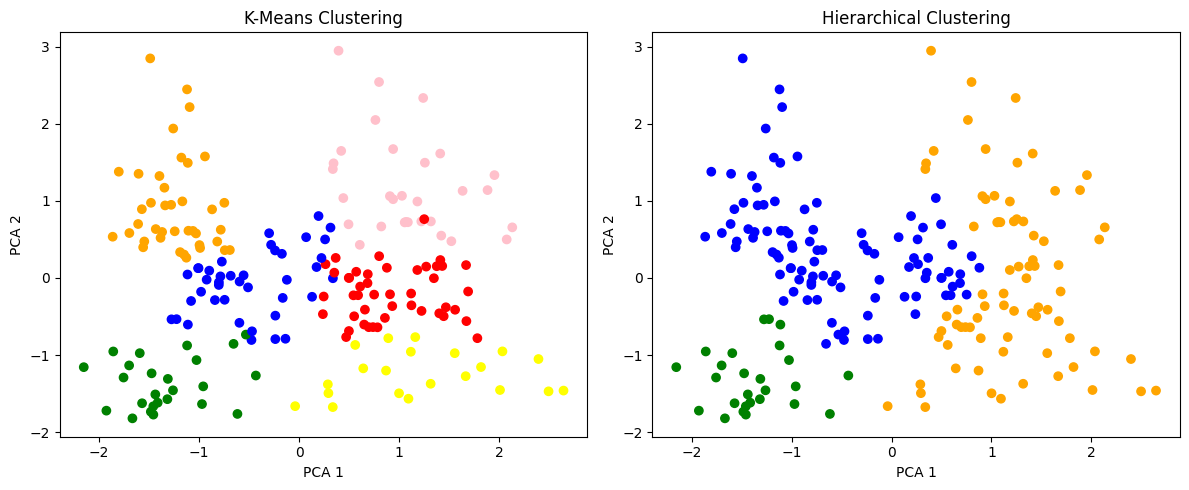

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create color lists from cluster labels using your custom mapping
kmeans_colors = [cluster_colors[label] for label in labels]
hierarchical_colors = [cluster_colors[label] for label in hierarchical_labels]

# Plotting with consistent colors
plt.figure(figsize=(12, 5))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_colors)
plt.title("K-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Hierarchical plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_colors)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(labels, hierarchical_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.32


In [ ]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X, labels)
score_hierarchical = silhouette_score(X, hierarchical_labels)

print(f"K-Means Silhouette Score: {score_kmeans:.2f}")
print(f"Hierarchical Clustering Silhouette Score: {score_hierarchical:.2f}")

K-Means Silhouette Score: 0.34
Hierarchical Clustering Silhouette Score: 0.32


In [ ]:
df.to_csv('clustered_clients.csv', index=False)

In [ ]:
from google.colab import files
files.download('clustered_clients.csv')

# **intereta**

/tmp/ipython-input-64-2936928538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set1')


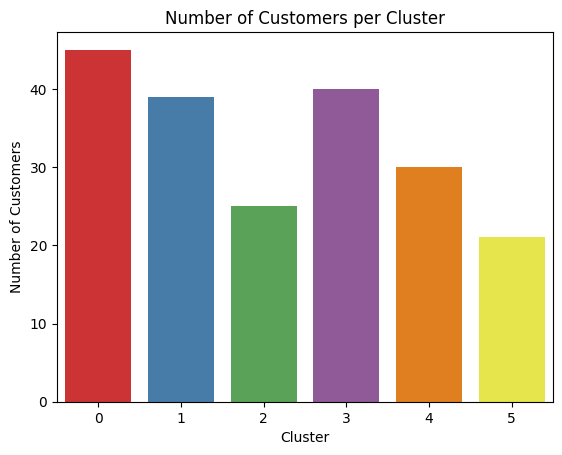

In [ ]:
import seaborn as sns
import pandas as pd

cluster_counts = df['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set1')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Cluster')
plt.show()


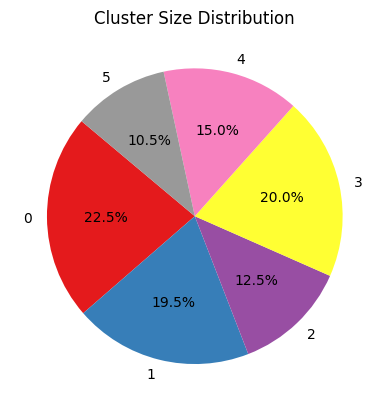

In [ ]:
cluster_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set1')
plt.title('Cluster Size Distribution')
plt.ylabel('')
plt.show()


In [ ]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary['Size'] = df['Cluster'].value_counts().sort_index()
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100),Size
Cluster,,,,
0,56.3,54.3,49.1,45
1,32.7,86.5,82.1,39
2,25.6,26.5,76.2,25
3,26.1,59.4,44.4,40
4,44.0,90.1,17.9,30
5,45.5,26.3,19.4,21
